**COST-BENEFIT ANALYSIS**

	1.	Define individual annual operating costs and benefits for each year from 2010 to 2025.
	2.	Calculate Net Present Value (NPV) and Benefit-Cost Ratio (BCR) using these individual values.
	3.	Perform the cost-benefit analysis based on this modified dataset.

In [1]:
#1. Create the Dataset
import pandas as pd

# Define the dataset with individual operating costs and benefits for each year
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
             2020, 2021, 2022, 2023, 2024, 2025],
    'Operating_Cost': [12000, 15000, 14000, 13000, 13500, 12500, 15000, 16000, 17000, 18000,
                       19000, 20000, 21000, 22000, 23000, 24000],
    'Benefit': [30000, 32000, 34000, 36000, 38000, 40000, 42000, 44000, 46000, 48000,
                50000, 52000, 54000, 56000, 58000, 60000]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Display the dataset
print(df)

    Year  Operating_Cost  Benefit
0   2010           12000    30000
1   2011           15000    32000
2   2012           14000    34000
3   2013           13000    36000
4   2014           13500    38000
5   2015           12500    40000
6   2016           15000    42000
7   2017           16000    44000
8   2018           17000    46000
9   2019           18000    48000
10  2020           19000    50000
11  2021           20000    52000
12  2022           21000    54000
13  2023           22000    56000
14  2024           23000    58000
15  2025           24000    60000


In [2]:
#2. Calculate Net Present Value (NPV)
# Define the discount rate and initial investment
initial_cost = 100000  # Initial investment cost
discount_rate = 0.05   # Discount rate (5%)

# Function to calculate NPV with varying annual costs and benefits
def npv_varying(df, discount_rate, initial_cost):
    npv_value = -initial_cost  # Start with initial cost
    for index, row in df.iterrows():
        year = row['Year']
        net_benefit = row['Benefit'] - row['Operating_Cost']  # Net benefit each year
        npv_value += net_benefit / (1 + discount_rate) ** (year - 2010 + 1)  # Discount each year's benefit
    return npv_value

# Calculate NPV
npv_value = npv_varying(df, discount_rate, initial_cost)
print(f"Net Present Value (NPV): ${npv_value:,.2f}")

Net Present Value (NPV): $187,673.92


In [3]:
#3. Calculate Benefit-Cost Ratio (BCR)
# Function to calculate BCR with varying annual costs and benefits
def bcr_varying(df, discount_rate, initial_cost):
    total_benefits = 0
    total_costs = initial_cost  # Initial cost is part of the total cost
    for index, row in df.iterrows():
        year = row['Year']
        total_benefits += row['Benefit'] / (1 + discount_rate) ** (year - 2010 + 1)  # Discounted benefits
        total_costs += row['Operating_Cost'] / (1 + discount_rate) ** (year - 2010 + 1)  # Discounted costs
    return total_benefits / total_costs

# Calculate BCR
bcr_value = bcr_varying(df, discount_rate, initial_cost)
print(f"Benefit-Cost Ratio (BCR): {bcr_value:.2f}")

Benefit-Cost Ratio (BCR): 1.68


**TREND ANALYSIS OF YEARLY BCR**

	1.	Calculate the BCR for each year: We’ll calculate the BCR for each year individually using the varying costs and benefits.
	2.	Plot the BCR trend: We will visualise the BCR over time to identify any patterns or trends.
	3.	Apply Moving Average: To smooth out fluctuations and reveal the overall trend.
	4.	(Optional) Time Series Decomposition: Decompose the BCR time series to isolate trend, seasonality, and residuals.


In [4]:
#1. Calculate the BCR for Each Year
import pandas as pd

# Define the dataset with individual operating costs and benefits for each year
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
             2020, 2021, 2022, 2023, 2024, 2025],
    'Operating_Cost': [12000, 15000, 14000, 13000, 13500, 12500, 15000, 16000, 17000, 18000,
                       19000, 20000, 21000, 22000, 23000, 24000],
    'Benefit': [30000, 32000, 34000, 36000, 38000, 40000, 42000, 44000, 46000, 48000,
                50000, 52000, 54000, 56000, 58000, 60000]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Function to calculate BCR for each year
def calculate_bcr(df):
    df['BCR'] = df['Benefit'] / df['Operating_Cost']  # Calculate BCR for each year
    return df

# Calculate BCR
df = calculate_bcr(df)

# Display the DataFrame with BCR values
print(df)

    Year  Operating_Cost  Benefit       BCR
0   2010           12000    30000  2.500000
1   2011           15000    32000  2.133333
2   2012           14000    34000  2.428571
3   2013           13000    36000  2.769231
4   2014           13500    38000  2.814815
5   2015           12500    40000  3.200000
6   2016           15000    42000  2.800000
7   2017           16000    44000  2.750000
8   2018           17000    46000  2.705882
9   2019           18000    48000  2.666667
10  2020           19000    50000  2.631579
11  2021           20000    52000  2.600000
12  2022           21000    54000  2.571429
13  2023           22000    56000  2.545455
14  2024           23000    58000  2.521739
15  2025           24000    60000  2.500000


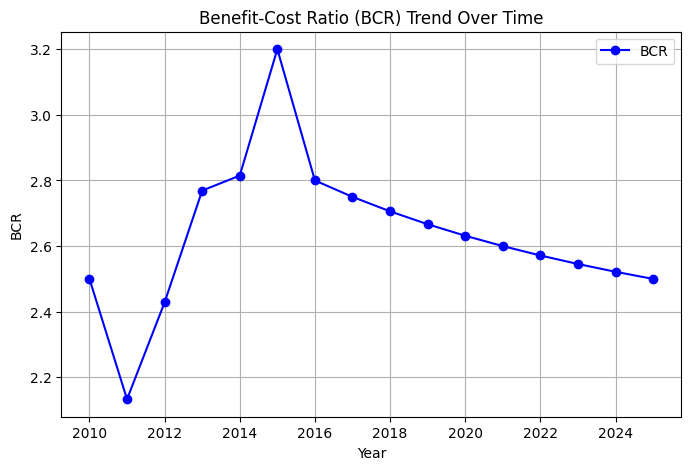

In [5]:
#2. Visualise the BCR Trend
import matplotlib.pyplot as plt

# Plot the BCR trend over time
plt.figure(figsize=(8, 5))
plt.plot(df['Year'], df['BCR'], marker='o', color='blue', label='BCR')
plt.title('Benefit-Cost Ratio (BCR) Trend Over Time')
plt.xlabel('Year')
plt.ylabel('BCR')
plt.grid(True)
plt.legend()
plt.show()

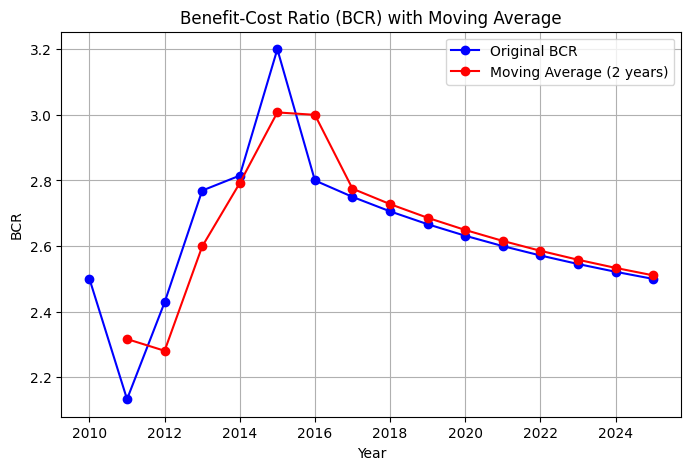

In [6]:
#3. Apply Moving Average for Smoothing
# Calculate a 2-year moving average for BCR
df['BCR_MA'] = df['BCR'].rolling(window=2).mean()

# Plot the original BCR and the moving average
plt.figure(figsize=(8, 5))
plt.plot(df['Year'], df['BCR'], marker='o', color='blue', label='Original BCR')
plt.plot(df['Year'], df['BCR_MA'], marker='o', color='red', label='Moving Average (2 years)')
plt.title('Benefit-Cost Ratio (BCR) with Moving Average')
plt.xlabel('Year')
plt.ylabel('BCR')
plt.grid(True)
plt.legend()
plt.show()

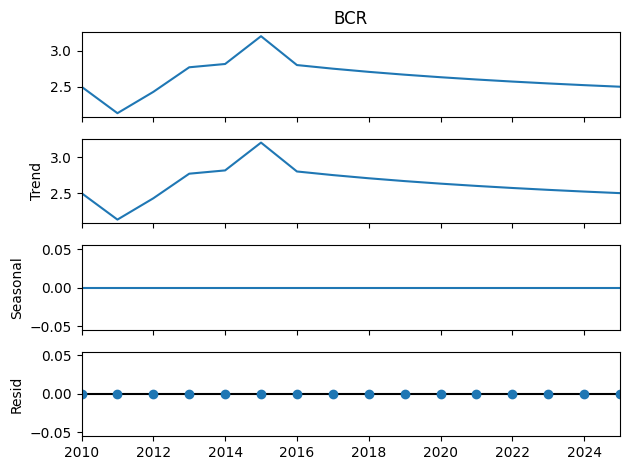

In [7]:
4. #(Optional) Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the Year column as the index for time series analysis
df.set_index('Year', inplace=True)

# Decompose the BCR time series
decomposition = seasonal_decompose(df['BCR'], model='additive', period=1)

# Plot the decomposition results
decomposition.plot()
plt.show()

**COMPARISON ANALYSIS (pre- post- 2014)**

	1.	Split the dataset into two subsets: one for years before 2014 and one for years 2014 and after.
	2.	Calculate summary statistics for each subset, such as the mean and median BCR.
	3.	Visualise the comparison using box plots or line plots to show the difference between the two periods.
	4.	Perform statistical testing (optional) to determine if there is a significant difference between the two periods.

In [8]:
#1. Split the Data Pre and Post 2014
# Split the data into pre-2014 and post-2014 subsets
df_pre_2014 = df[df.index < 2014]
df_post_2014 = df[df.index >= 2014]

# Display the two subsets
print("BCR data pre-2014:")
print(df_pre_2014)

print("\nBCR data post-2014:")
print(df_post_2014)

BCR data pre-2014:
      Operating_Cost  Benefit       BCR    BCR_MA
Year                                             
2010           12000    30000  2.500000       NaN
2011           15000    32000  2.133333  2.316667
2012           14000    34000  2.428571  2.280952
2013           13000    36000  2.769231  2.598901

BCR data post-2014:
      Operating_Cost  Benefit       BCR    BCR_MA
Year                                             
2014           13500    38000  2.814815  2.792023
2015           12500    40000  3.200000  3.007407
2016           15000    42000  2.800000  3.000000
2017           16000    44000  2.750000  2.775000
2018           17000    46000  2.705882  2.727941
2019           18000    48000  2.666667  2.686275
2020           19000    50000  2.631579  2.649123
2021           20000    52000  2.600000  2.615789
2022           21000    54000  2.571429  2.585714
2023           22000    56000  2.545455  2.558442
2024           23000    58000  2.521739  2.533597
2025      

In [9]:
#2. Calculate Summary Statistics
# Summary statistics for BCR pre-2014
stats_pre_2014 = df_pre_2014['BCR'].describe()
print("\nSummary statistics pre-2014:")
print(stats_pre_2014)

# Summary statistics for BCR post-2014
stats_post_2014 = df_post_2014['BCR'].describe()
print("\nSummary statistics post-2014:")
print(stats_post_2014)


Summary statistics pre-2014:
count    4.000000
mean     2.457784
std      0.261345
min      2.133333
25%      2.354762
50%      2.464286
75%      2.567308
max      2.769231
Name: BCR, dtype: float64

Summary statistics post-2014:
count    12.000000
mean      2.692297
std       0.191404
min       2.500000
25%       2.564935
50%       2.649123
75%       2.762500
max       3.200000
Name: BCR, dtype: float64


<Figure size 800x500 with 0 Axes>

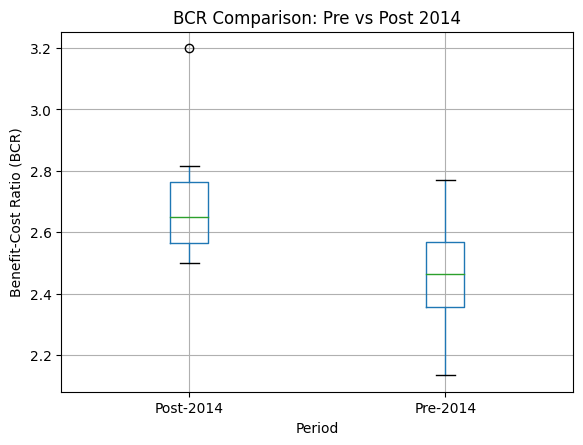

In [10]:
#3. Visualise the Comparison
#A. Box Plot:
# Combine the pre and post 2014 data for visualisation
df['Period'] = ['Pre-2014' if year < 2014 else 'Post-2014' for year in df.index]

# Plot a box plot to compare the BCR pre and post 2014
plt.figure(figsize=(8, 5))
df.boxplot(column='BCR', by='Period')
plt.title('BCR Comparison: Pre vs Post 2014')
plt.suptitle('')  # Remove the automatic "Boxplot grouped by Period" title
plt.ylabel('Benefit-Cost Ratio (BCR)')
plt.grid(True)
plt.show()

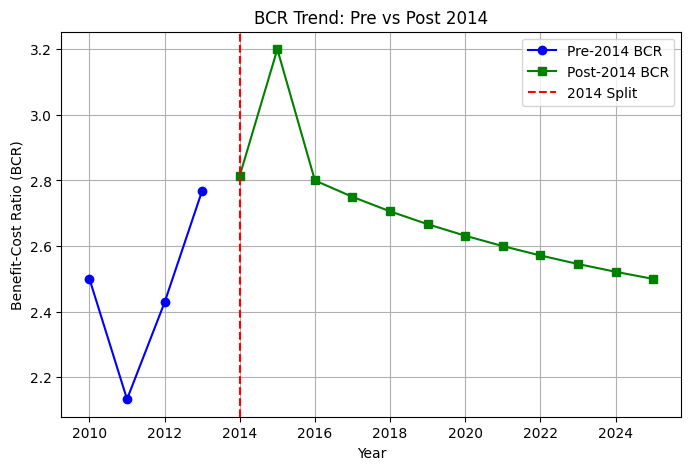

In [11]:
#B. Line Plot:
# Plot the BCR trend with pre and post 2014 differentiation
plt.figure(figsize=(8, 5))
plt.plot(df_pre_2014.index, df_pre_2014['BCR'], marker='o', label='Pre-2014 BCR', color='blue')
plt.plot(df_post_2014.index, df_post_2014['BCR'], marker='s', label='Post-2014 BCR', color='green')
plt.axvline(x=2014, color='red', linestyle='--', label='2014 Split')
plt.title('BCR Trend: Pre vs Post 2014')
plt.xlabel('Year')
plt.ylabel('Benefit-Cost Ratio (BCR)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
#4. Perform Statistical Testing (Optional)
#If you want to check if the difference between the BCR values in the two periods
#is statistically significant, you can perform a t-test or Mann-Whitney U test
# (if the data is not normally distributed).

#A. T-test:
from scipy.stats import ttest_ind

# Perform a t-test to compare the means of the two periods
t_stat, p_value = ttest_ind(df_pre_2014['BCR'], df_post_2014['BCR'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference between the BCR pre-2014 and post-2014.")
else:
    print("There is no statistically significant difference between the BCR pre-2014 and post-2014.")

T-statistic: -1.9492997058509625
P-value: 0.071583125759085
There is no statistically significant difference between the BCR pre-2014 and post-2014.


In [13]:
#B. Mann-Whitney U Test:
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test
u_stat, p_value = mannwhitneyu(df_pre_2014['BCR'], df_post_2014['BCR'])

print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference between the BCR pre-2014 and post-2014.")
else:
    print("There is no statistically significant difference between the BCR pre-2014 and post-2014.")

U-statistic: 9.5
P-value: 0.08931935339369107
There is no statistically significant difference between the BCR pre-2014 and post-2014.
